# Week10 - Test on second dataset

test my sub-question for participant5

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
M5 = pd.read_csv('/content/drive/MyDrive/modifydata.csv')
M5

,Date,Count
0,2022-01-01,114
1,2022-01-02,8681
2,2022-01-03,5104
3,2022-01-04,8031
4,2022-01-05,7743
...,...,...
217,2022-08-28,12888
218,2022-08-29,6036
219,2022-08-30,9820
220,2022-08-31,10523


Change steps into integer

In [9]:
M5['Date'].replace('-','',regex=True,inplace=True) # replace some unwanted parts of character.
M5.head()
M5['Date'] = pd.to_datetime(M5['Date'], format='%Y%m%d')# convert it into normalized forms.
print(M5.dtypes)

Date     datetime64[ns]
Count             int64
dtype: object


Aggregate by weekly data

In [10]:
M5_clean=M5 
M5_clean=M5_clean.resample('W-Mon', on='Date').sum() # resample into week
M5_clean.head() # check the weekly step counts
m4=M5_clean
m4['date']=m4.index

In [13]:
m4

,Count,date
Date,,
2022-01-03,13899,2022-01-03
2022-01-10,27776,2022-01-10
2022-01-17,0,2022-01-17
2022-01-24,0,2022-01-24
2022-01-31,4,2022-01-31
2022-02-07,37294,2022-02-07
2022-02-14,44348,2022-02-14
2022-02-21,37655,2022-02-21
2022-02-28,47789,2022-02-28


# Draw the graph

(array([738145., 738150., 738155., 738160., 738165., 738170., 738175.,
        738180., 738185., 738190., 738195., 738200., 738205., 738210.,
        738215., 738220., 738225., 738230., 738235., 738240., 738245.,
        738250., 738255., 738260., 738265., 738270., 738275., 738280.,
        738285., 738290., 738295., 738300., 738305., 738310., 738315.,
        738320., 738325., 738330., 738335., 738340., 738345., 738350.,
        738355., 738360., 738365., 738370., 738375., 738380., 738385.,
        738390., 738395., 738400., 738405., 738410., 738415., 738420.]),
 <a list of 56 Text major ticklabel objects>)

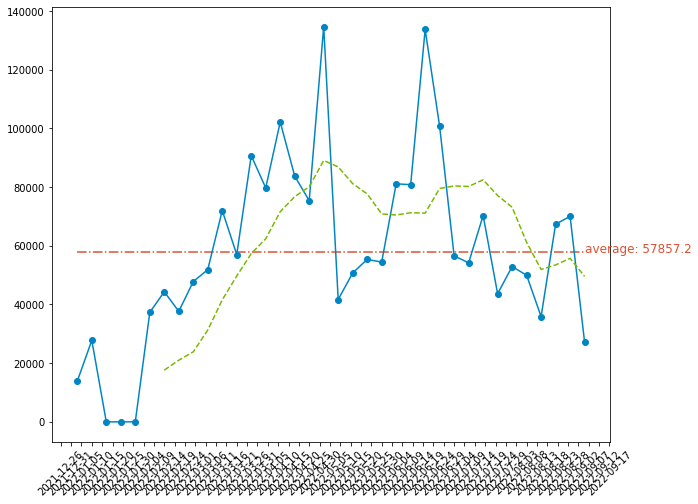

In [17]:
x = m4.date
y = m4['Count']# define the variable
color1 = '#0085c3'
color2 = '#7ab800'
color3 = '#dc5034' # define the color
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111) # set the size of the image
ax.plot(x, y, marker='o', color=color1) # draw the plot
y2 = y.rolling(7).mean() # calculate week trend
ax.plot(x, y2, ls='--', color=color2, label='week average') # draw trend
ax.hlines(y.mean(), x[0], x[-1:],
          linestyles='-.', colors=color3) # draw average
ax.text(x[-1:], y.mean()-2,
        'average: ' + str(round(y.mean(),1)),
        color=color3, fontsize=12) # indicate average
import matplotlib as mpl
xlocator = mpl.ticker.MultipleLocator(5)
ax.xaxis.set_major_locator(xlocator)
plt.xticks(rotation=45) # adjust x plot

# Conclusion

Participant 5 also shows willingness to walk during exam week. Step counts for exam week are above average and indicates clear sign of active.